In [1]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

IMAGE_SIZE = 1800
BINARY_THREHOLD = 180

def process_image_for_ocr(file_path):
    # TODO : Implement using opencv
    set_image_dpi(file_path)
    im_new = remove_noise_and_smooth('sample300.png')
    return im_new

def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = max(1, int(IMAGE_SIZE / length_x))
    size = factor * length_x, factor * width_y
    # size = (1800, 1800)
    im_resized = im.resize(size, Image.ANTIALIAS)
    im_resized.save('sample300.png', dpi=(300, 300))

def image_smoothening(img):
    ret1, th1 = cv2.threshold(img, BINARY_THREHOLD, 255, cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(th1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    blur = cv2.GaussianBlur(th2, (1, 1), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th3

def remove_noise_and_smooth(file_name):
    img = cv2.imread(file_name, 0)
    filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 41,
                                     3)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    img = image_smoothening(img)
    kernel = np.ones((5,5),np.uint8)
    or_image = cv2.bitwise_or(img, closing)
    
    return or_image

In [4]:
def plotimage(file_path, img):
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25,40))

    ax[0].imshow(cv2.imread(file_path, 0), cmap="gray")
    ax[1].imshow(img, cmap="gray")

    plt.tight_layout()
    plt.show()

In [11]:
from tesserocr import PyTessBaseAPI
from tesserocr import PSM

def ocrfunc(file):
    
    tess = "C:/Users/shubh/Anaconda3/pkgs/tesserocr-2.4.0-py37_tesseract_4.0.0_0/Lib/site-packages/tesserocr/tessdata"
    with PyTessBaseAPI(path=tess, lang='eng', psm=PSM.SPARSE_TEXT_OSD) as api:
        api.SetImageFile(file)
        print(api.GetUTF8Text())

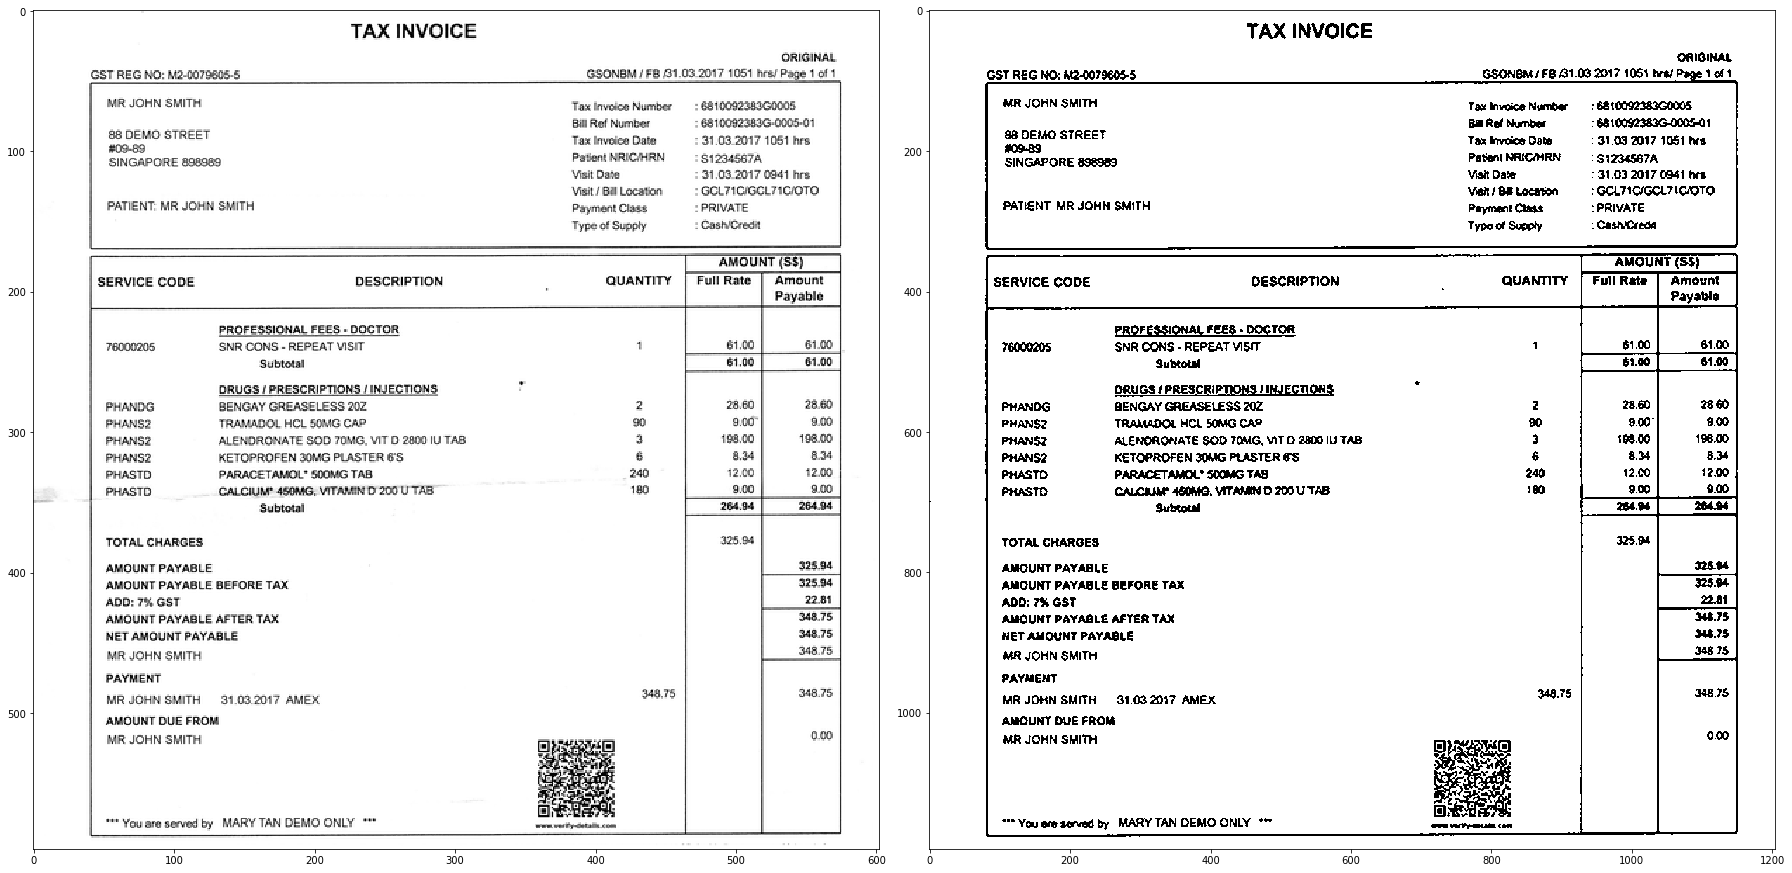

In [5]:
file_path = 'sampe4.png'
im_new = process_image_for_ocr(file_path)

cv2.imwrite('test1.png', im_new)
plotimage(file_path, im_new)

In [12]:
ocrfunc('test1.png')

TAX INVOICE

ORIGINAL

GST REG NO: M2-0079605-5

GSONBM / £8 81.03 2017 1051 hess

0

1001

MR JOHN SMITH

Tax lavoice Number

6810092383G0005.

B Ref Number

6810092383G-0005-01

88 DEMO STREET

Tax lnvoice Date

31.03 2017 1051 hws.

SINGAPORE 898989

Patent NRICHRN

S1234567A

Visit Date

31.03 2017 0941 hrs

Visit/ B8 Locaton

GCLTIC/GCLTICOTO

PATIENT. MR JOHN SMITH

Payment Class

PRIVATE

Typo of Supply

Cash'Credn

SERVICE CODE

DESCRIPTION

o [P | oo |

Fi

FEES .

TOR

76000205

SNR CONS - REPEAT VISIT

ol o

Subtotsl

[ sw] 0]

DRUGS ! PRESCRIPTIONS / INJECTIONS

PHANDG

BENGAY GREASELESS 20

28.60

2860

PHANS2

TRAMADOL HCL S0MG CAP

9.00°

2.00

198.00

PHANSZ

ALENORONATE SOD 70MG, VT D 2800 IU TAB

158.00

PHANSZ

KETOPROFEN 30MG PLASTER 6'S

%

a4

834

240

12.00

1200

PHASTD

PARACETAMOL® S00MG TAS

PHASTD

CALCIUM" 450MG, VITAMIN D 200 U TAB

180

9.00

Subtotsl

TOTAL CHARGES

AMOUNT PAYABLE

i

AMOUNT PAYABLE BEFORE TAX

ADD: 7% GST

75

AMOUNT PAYABLE AFTER TAX


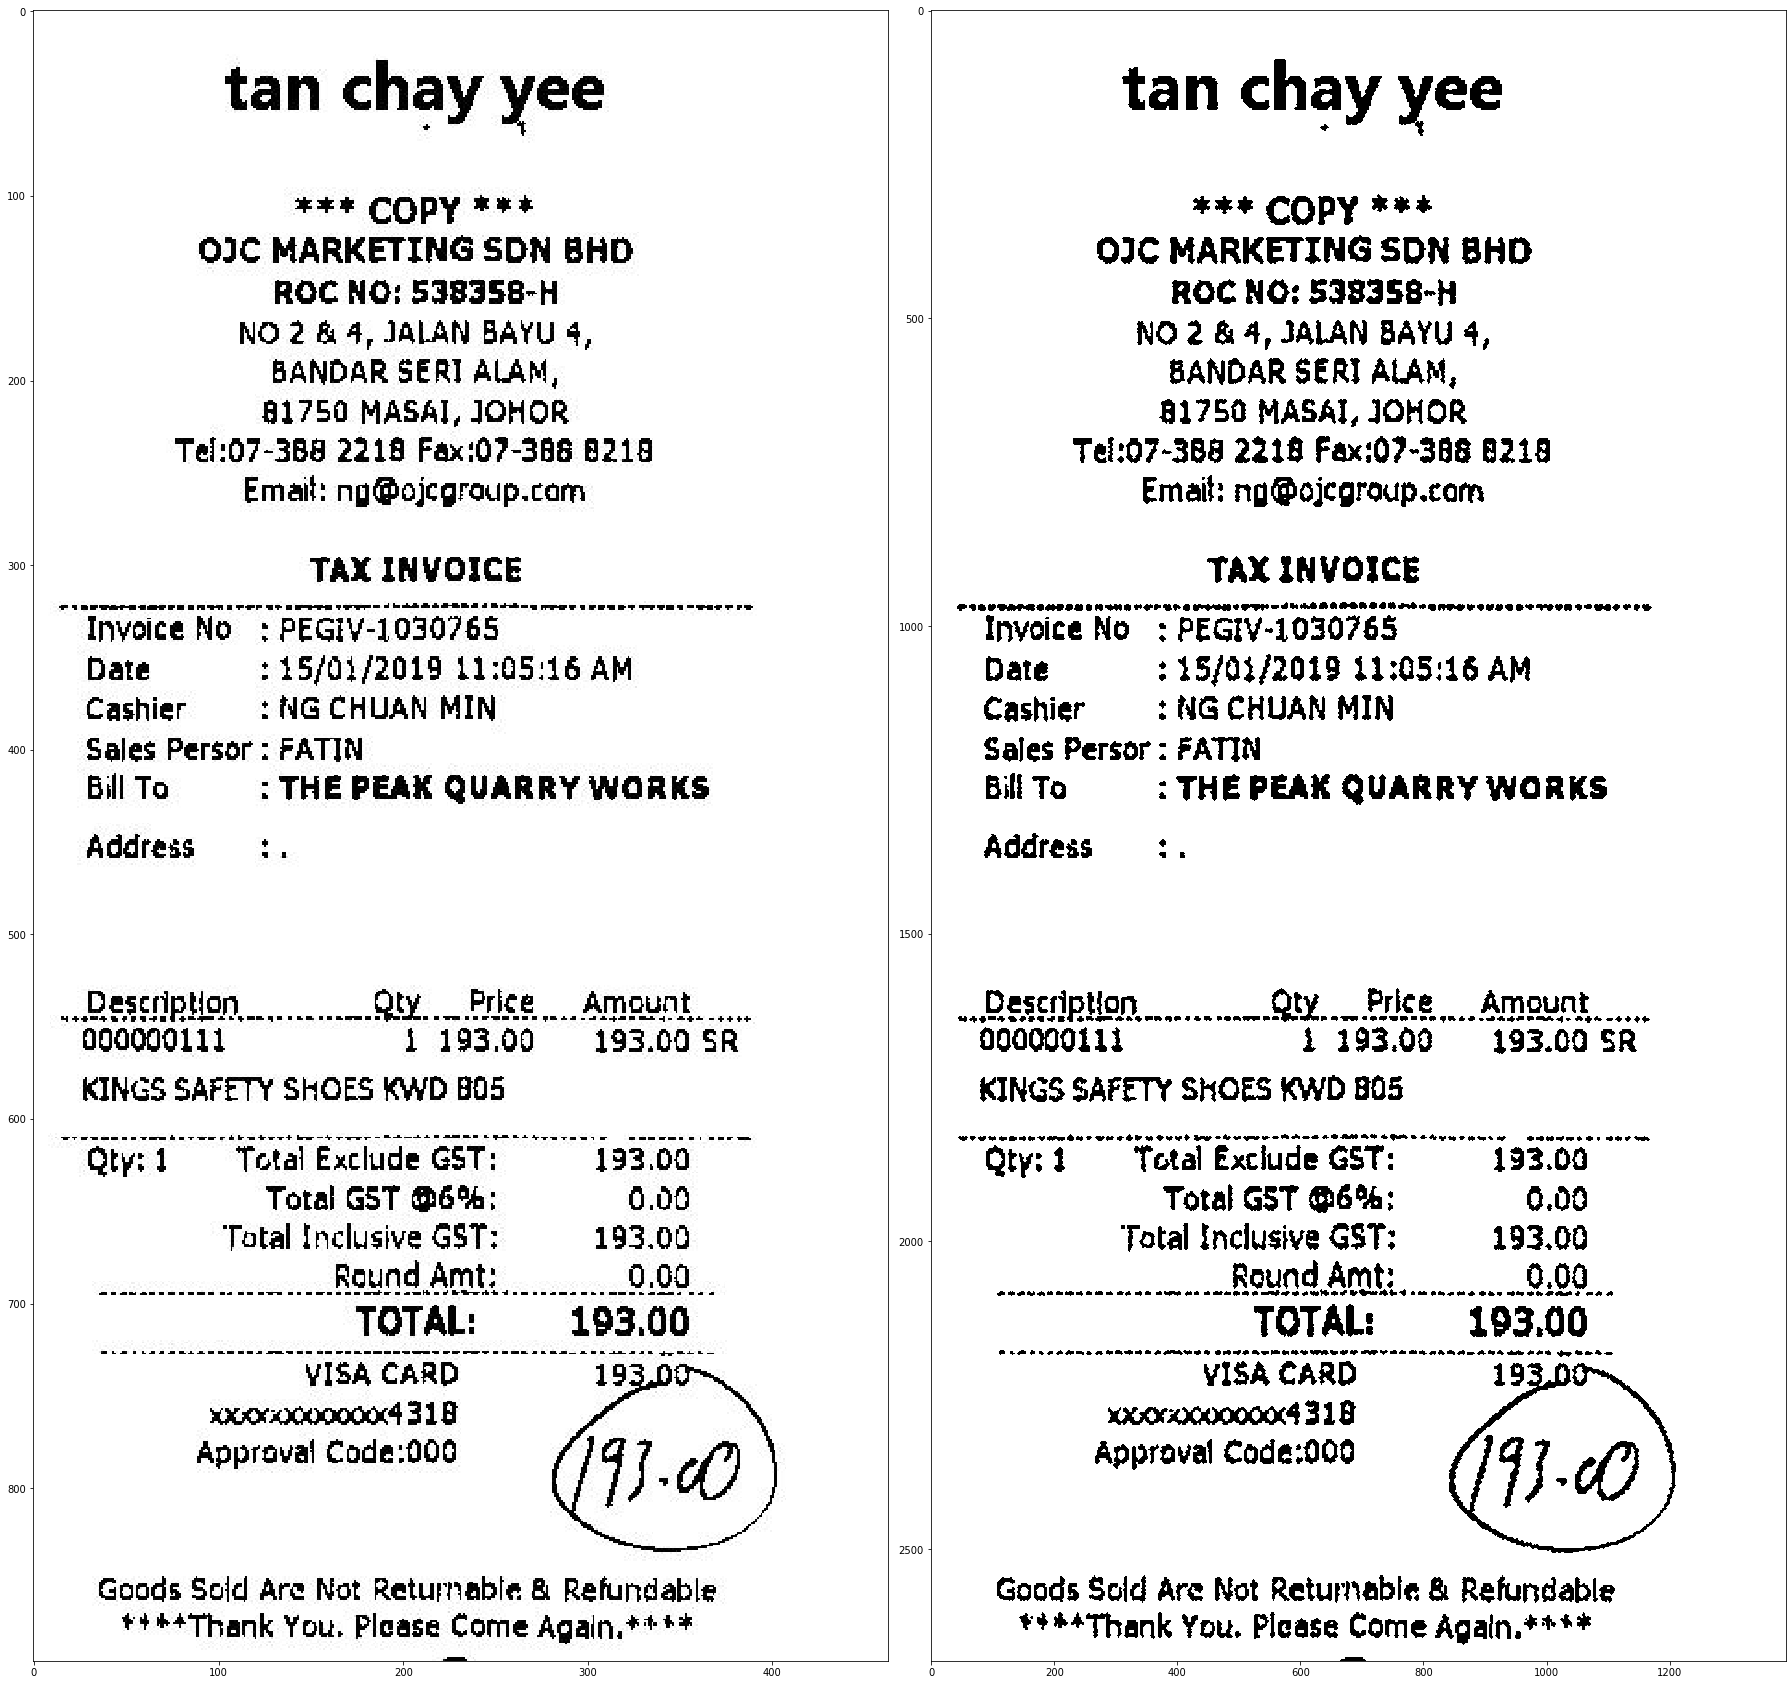

In [25]:
file_path = 'sam.jpg'
im_new = process_image_for_ocr(file_path)

cv2.imwrite('test2.png', im_new)
plotimage(file_path, im_new)

In [26]:
ess = "C:/Users/shubh/Anaconda3/pkgs/tesserocr-2.4.0-py37_tesseract_4.0.0_0/Lib/site-packages/tesserocr/tessdata"
with PyTessBaseAPI(path=tess, lang='eng', psm=PSM.SPARSE_TEXT_OSD) as api:
    api.SetImageFile('test2.png')
    print(api.GetUTF8Text())

tan chay yee

*** COPY xxk

0JC MARKETING SDN BHOD

ROC NO: 538358-H

NO 2 & 4, JALAN BAYU 4,

BANDAR SERT ALAM,

81750 MASAL, JOHOR

Tei:07-388 2218 Fax:07-368 8218

Emait: ng@ojcgraup.com

TAX INVOICE

PGPV PAPRENDIINERINA TSP UL SIINN PPN T I LA A ANORSIAIN T NPV IFIEOT VIVRITUES VIV

Invoice No

: PEGIV-1030765

Date

:15/01/72019 11:05:16 AM

Cashier

: NG CHUAN MIN

Sales Persor : FATIN

Bill To

: THE PEAK QUARRY WORKS

Address

*

Price

Amount

ooooooooooo

000000111

Description

sagmAssEAqesLa seannea

Qty

1 193.00

. R P UNCCN FRAS cn AN ARy APA = s P

193.00 SR

KINGS SAFETY SHOES KWD B0S

PPN ER SR VHRAN I PR PP NIVYS PP A P TE P c R AR AL ANAN LRRLANYNIRNNI Y  CUNTRE S SR -

Qty:

Total Exclude GST:

133.00

Total GST §6%:;

0.06

Total Inclusive GST:

183.00

AN AN RN Y A NE LT N E L RN P A WHE P NTWACY S0 LN AL SR NR TR RAN) BA s

Round Amt:

0,00

TOTAL:

193.0

LR R T s L L e e e et el e L T X T W RRFYY SUONPI T ey puy S

YISA CARD

19

XXOE000004 318

Approval Code